<h1 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">Machine Learning Laboratory </h1>
<h2 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">(410302) </h2>
<h3 style="font-family:Bookman Old Style;text-align:center;font-size=35px;color:#03D1EE;">BE Sem I Honors in AI/ML </h3>
<h4 style="font-family:Bookman Old Style;text-align:center;font-size=30px;color:#03D1EE;">Academic Year: 2022-23 </h4>
<h2 style="font-family:Farro;text-align:center;font-size=50px;color:#02DA87;">Lab Assignment No.1  </h2>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Name - XYZ </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Roll No. - 12345 </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Branch - E&TE </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">College - P.I.C.T </h4>
<br>

<p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#E35E06;">Problem Statement:<br>Creating & Visualizing Neural Network for the given data.
</p>

<p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#D90571;">Note:<br>1. Download dataset using Kaggle or you can use any other dataset.<br>2. Keras, ANN visualizer, graph viz libraries are required.
<br>3. Learn to preprocess your data, model, evaluate and optimize neural networks.<br><br>
</p>

In [28]:
import os

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import optimizers

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

import itertools

import seaborn as sns

In [29]:
# show data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

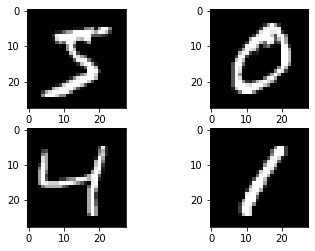

In [30]:
# plot 4 images as gray scale

plt.subplot(221)

plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)

plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)

plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)

plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot

plt.show()

In [31]:
pd.set_option('display.max_columns', 28)

pd.DataFrame(X_train[0]), 

(    0   1   2   3    4    5    6    7    8    9    10   11   12   13   14  \
 0    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
 1    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
 2    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
 3    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
 4    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
 5    0   0   0   0    0    0    0    0    0    0    0    0    3   18   18   
 6    0   0   0   0    0    0    0    0   30   36   94  154  170  253  253   
 7    0   0   0   0    0    0    0   49  238  253  253  253  253  253  253   
 8    0   0   0   0    0    0    0   18  219  253  253  253  253  253  198   
 9    0   0   0   0    0    0    0    0   80  156  107  253  253  205   11   
 10   0   0   0   0    0    0    0    0    0   14    1  154  253   90    0   
 11   0   0   0   0    0    0    0    0    0    0    0  139  253

(5, <matplotlib.image.AxesImage at 0x2d6f1cc8df0>)

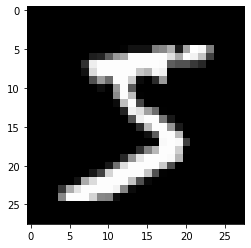

In [32]:
(y_train[0], plt.imshow(X_train[0], cmap=plt.get_cmap('gray')))

In [33]:
(y_train[0], X_train[0])

(5,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
        

In [34]:
print('Shape X train: ', X_train.shape)

print('Shape y train: ', y_train.shape)

Shape X train:  (60000, 28, 28)
Shape y train:  (60000,)


In [35]:
# flattening 28*28 images to a 784 vector for each image

num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

print('Shape X train: ', X_train.shape)

Shape X train:  (60000, 784)


In [36]:
(y_train[0], X_train[0])

(5,
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   

In [37]:
# normalizing inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [38]:
y_train = np.asarray(pd.get_dummies(y_train))

y_test = np.asarray(pd.get_dummies(y_test))

num_classes = y_test.shape[1]

In [39]:
model = Sequential()

model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))

model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Attempting to fit the model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2762 - accuracy: 0.9205 - val_loss: 0.1423 - val_accuracy: 0.9579
Epoch 2/10
300/300 - 3s - loss: 0.1086 - accuracy: 0.9690 - val_loss: 0.0956 - val_accuracy: 0.9706
Epoch 3/10
300/300 - 3s - loss: 0.0694 - accuracy: 0.9798 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 4/10
300/300 - 3s - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0681 - val_accuracy: 0.9783
Epoch 5/10
300/300 - 3s - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 6/10
300/300 - 3s - loss: 0.0266 - accuracy: 0.9926 - val_loss: 0.0684 - val_accuracy: 0.9782
Epoch 7/10
300/300 - 3s - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.0633 - val_accuracy: 0.9793
Epoch 8/10
300/300 - 3s - loss: 0.0142 - accuracy: 0.9967 - val_loss: 0.0629 - val_accuracy: 0.9799
Epoch 9/10
300/300 - 3s - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0625 - val_accuracy: 0.9800
Epoch 10/10
300/300 - 3s - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.0633 - val_accuracy: 0.9804

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Model evaluation
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 0.06327315419912338
Test accuracy: 0.980400025844574


In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)
    
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i, j],
        
                 horizontalalignment="center",
                 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')

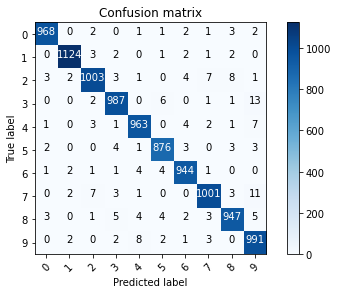

In [44]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

<br><p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#8E06E3;">Conclusion<br>
In this assignment, we have learnt about the Convolutional Neural Networks and implemented it on Digit Recognizer dataset, to analyze the working of the CNN model. </p>